In [1]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import socket
import struct
import time
%matplotlib inline

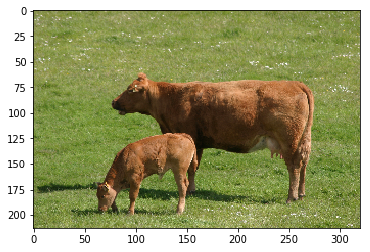

In [2]:
# load image
img_name = '1_9_s.png'
unary_name = '1_9_s.c_unary'
img = plt.imread(img_name)
plt.imshow(img)

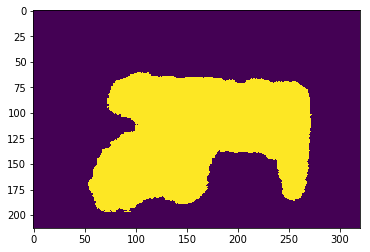

In [3]:
# load unary file

with open(unary_name, 'rb') as fp:
    temp = [fp.read(4) for i in range(5)]
    width = socket.ntohl(struct.unpack('I', temp[0])[0])
    height = socket.ntohl(struct.unpack('I', temp[1])[0])
    depth = socket.ntohl(struct.unpack('I', temp[2])[0])
    M = socket.ntohl(struct.unpack('I', temp[3])[0])
    eps = float(socket.ntohl(struct.unpack('I', temp[4])[0]))
    temp = [fp.read(4) for i in range(M*depth)]
    ukeys = [socket.ntohl(struct.unpack('I', temp[i])[0]) for i in range(len(temp))]
    temp = [fp.read(4) for i in range(height*width)]
    ids = [socket.ntohl(struct.unpack('I', temp[i])[0]) for i in range(len(temp))]
    
unary = np.zeros([height*width, depth])
for i in range(height*width):
    k = ids[i]*depth
    for j in range(depth):
        unary[i,j] = ukeys[k+j]*eps
        
Prob_u = np.reshape(unary, newshape=[height, width, depth])
Prob_u = Prob_u/np.sum(Prob_u, axis=-1)[:,:,None]
plt.imshow(np.argmax(Prob_u, axis=2))